In [1]:
import pandas as pd
import numpy as np

df_vendas = pd.read_csv("../dados/vendas_tech.csv", low_memory=False)
display(df_vendas)
df_gerente = pd.read_excel("../dados/gerentes_lojas.xlsx")
display(df_gerente)


,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Data_Base
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,2025-01-01
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750,NaN
2,3,2023-02-25,NaN,"Monitor 27""",1200.0,1,Cliente_14859,NaN
3,4,2024-11-19,RIO DE JANEIRO,Mouse Gamer,120.0,2,Cliente_17343,NaN
4,5,2024-01-27,Rio de Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,NaN
...,...,...,...,...,...,...,...,...
100095,94091,2023-10-20,Porto Alegre,iPhone 14,5500.0,1,Cliente_11755,NaN
100096,52883,2024-03-17,Porto Alegre,Notebook Dell,3500.0,2,Cliente_12879,NaN
100097,65070,2023-06-19,Belo Horizonte,Smartphone Samsung,2200.0,2,Cliente_8160,NaN
100098,94031,2024-06-14,Salvador,iPhone 14,5500.0,2,Cliente_28545,NaN


,Loja,Gerente,Meta_Mensal
0,São Paulo,Carlos,50000
1,Rio de Janeiro,Fernanda,60000
2,Curitiba,Roberto,45000
3,Belo Horizonte,Juliana,55000
4,Recife,Marcos,48000
5,Porto Alegre,Pedro,42000
6,Salvador,Ana,52000


In [2]:
#Inspeção
display(df_vendas)
#display(df_vendas.head())
#display(df_vendas.tail())
#display(df_vendas.sample(15))
display(df_vendas.shape)
display(list(df_vendas.columns))
display(df_vendas.info())
display(df_vendas.describe())

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Data_Base
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,2025-01-01
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750,NaN
2,3,2023-02-25,NaN,"Monitor 27""",1200.0,1,Cliente_14859,NaN
3,4,2024-11-19,RIO DE JANEIRO,Mouse Gamer,120.0,2,Cliente_17343,NaN
4,5,2024-01-27,Rio de Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,NaN
...,...,...,...,...,...,...,...,...
100095,94091,2023-10-20,Porto Alegre,iPhone 14,5500.0,1,Cliente_11755,NaN
100096,52883,2024-03-17,Porto Alegre,Notebook Dell,3500.0,2,Cliente_12879,NaN
100097,65070,2023-06-19,Belo Horizonte,Smartphone Samsung,2200.0,2,Cliente_8160,NaN
100098,94031,2024-06-14,Salvador,iPhone 14,5500.0,2,Cliente_28545,NaN


(100100, 8)

['ID_Pedido',
 'Data',
 'Loja',
 'Produto',
 'Preco_Unitario',
 'Qtd',
 'Cliente',
 'Data_Base']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID_Pedido       100100 non-null  int64  
 1   Data            100100 non-null  object 
 2   Loja            98099 non-null   object 
 3   Produto         100100 non-null  object 
 4   Preco_Unitario  100100 non-null  float64
 5   Qtd             100100 non-null  int64  
 6   Cliente         100100 non-null  object 
 7   Data_Base       1 non-null       object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


None

,ID_Pedido,Preco_Unitario,Qtd
count,100100.000000,100100.000000,100100.000000
mean,50004.810180,2000.204595,1.499101
std,28866.872543,1841.050733,1.241605
min,1.000000,40.000000,1.000000
25%,25008.750000,120.000000,1.000000
50%,50004.500000,1200.000000,1.000000
75%,75002.250000,3200.000000,1.000000
max,100000.000000,5500.000000,10.000000


In [3]:
# Tratamento de Dados
#display(df_vendas["Loja"])
#display(df_vendas[["Loja", "Cliente"]])

# Colunas
df_analise = df_vendas.drop(columns=["Data_Base"])

# Nulos
##df_analise = df_analise.dropna() #excluir todas as colunas que têm 1 valor vazio
df_analise["Loja"] = df_analise["Loja"].fillna("Online")

# Tipos de dados
df_analise["Data"] = pd.to_datetime(df_analise["Data"], format="%Y-%m-%d")

# Padronização
df_analise["Loja"] = df_analise["Loja"].str.strip()
df_analise["Loja"] = df_analise["Loja"].str.title()

# Duplicatas
df_analise = df_analise.drop_duplicates(subset=["ID_Pedido"])

display(df_analise)
display(df_analise.info())

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750
2,3,2023-02-25,Online,"Monitor 27""",1200.0,1,Cliente_14859
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377
...,...,...,...,...,...,...,...
99995,99996,2023-01-24,São Paulo,Mouse Gamer,120.0,2,Cliente_13732
99996,99997,2024-08-28,Rio De Janeiro,Cabo HDMI,40.0,1,Cliente_25058
99997,99998,2024-03-18,Curitiba,Smartphone Samsung,2200.0,2,Cliente_28864
99998,99999,2023-11-04,Porto Alegre,iPhone 14,5500.0,1,Cliente_4205


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID_Pedido       100000 non-null  int64         
 1   Data            100000 non-null  datetime64[ns]
 2   Loja            100000 non-null  object        
 3   Produto         100000 non-null  object        
 4   Preco_Unitario  100000 non-null  float64       
 5   Qtd             100000 non-null  int64         
 6   Cliente         100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.1+ MB


None

In [4]:
# Criar novas colunas

# Faturamento
df_analise["Faturamento"] = df_analise["Qtd"] * df_analise["Preco_Unitario"]

# Forma de venda
df_analise["Forma_de_Venda"] = np.where(df_analise["Loja"] == "Online", "Online", "Presencial")

# Região
display(df_analise["Loja"].unique())

dic_regioes = {
    'São Paulo': "Sudeste",
    'Belo Horizonte': "Sudeste",
    'Online': "Online",
    'Rio De Janeiro': "Sudeste",
    'Salvador': "Nordeste",
    'Recife': "Nordeste",
    'Curitiba': "Sul",
    'Porto Alegre': "Sul "
}

df_analise["Região"] = df_analise["Loja"].map(dic_regioes)

display(df_analise)
display(df_analise.isna().sum())

array(['São Paulo', 'Belo Horizonte', 'Online', 'Rio De Janeiro',
       'Salvador', 'Recife', 'Curitiba', 'Porto Alegre'], dtype=object)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Região
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,120.0,Presencial,Sudeste
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750,5500.0,Presencial,Sudeste
2,3,2023-02-25,Online,"Monitor 27""",1200.0,1,Cliente_14859,1200.0,Online,Online
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343,240.0,Presencial,Sudeste
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,2200.0,Presencial,Sudeste
...,...,...,...,...,...,...,...,...,...,...
99995,99996,2023-01-24,São Paulo,Mouse Gamer,120.0,2,Cliente_13732,240.0,Presencial,Sudeste
99996,99997,2024-08-28,Rio De Janeiro,Cabo HDMI,40.0,1,Cliente_25058,40.0,Presencial,Sudeste
99997,99998,2024-03-18,Curitiba,Smartphone Samsung,2200.0,2,Cliente_28864,4400.0,Presencial,Sul
99998,99999,2023-11-04,Porto Alegre,iPhone 14,5500.0,1,Cliente_4205,5500.0,Presencial,Sul


ID_Pedido         0
Data              0
Loja              0
Produto           0
Preco_Unitario    0
Qtd               0
Cliente           0
Faturamento       0
Forma_de_Venda    0
Região            0
dtype: int64

In [5]:
# Analisar -> Filtrar

df_analise = df_analise.sort_values(by=["Data", "Faturamento"])
df_analise = df_analise.reset_index(drop=True)

#.loc: id do pedido -> por nome da coluna e por nome da linha
id_pedido = 4
loja = df_analise.loc[3, "Loja"]
produto = df_analise.loc[3, "Produto"]
cliente = df_analise.loc[3, "Cliente"]
print(loja, produto, cliente)

#.iloc -> por posicao
id_pedido = 4
loja = df_analise.iloc[3, 2]
produto = df_analise.iloc[3, 3]
cliente = df_analise.iloc[3, 6]
print(loja, produto, cliente)

# condicional
df_id_pedido_4 = df_analise[df_analise["ID_Pedido"]== 4 ]

# Exportar pedaçõs da base
df_vendas_sp = df_analise[df_analise["Loja"]== "São Paulo"]
df_vendas_sp.to_csv("../dados/vendas_sp.csv", index=False)
#df_vendas_sp = df_analise

# Exportar as vendas de 2024
df_vendas_2024 = df_analise[df_analise["Data"].dt.year == 2024]

##display(df_vendas_sp)
display(df_vendas_2024)

Porto Alegre Cabo HDMI Cliente_22886
Porto Alegre Cabo HDMI Cliente_22886


,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Região
50423,22735,2024-01-01,São Paulo,Cabo HDMI,40.0,1,Cliente_14772,40.0,Presencial,Sudeste
50424,31751,2024-01-01,Curitiba,Cabo HDMI,40.0,1,Cliente_16439,40.0,Presencial,Sul
50425,36481,2024-01-01,Salvador,Cabo HDMI,40.0,1,Cliente_4025,40.0,Presencial,Nordeste
50426,44184,2024-01-01,Curitiba,Cabo HDMI,40.0,1,Cliente_1577,40.0,Presencial,Sul
50427,44259,2024-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_1944,40.0,Presencial,Sul
...,...,...,...,...,...,...,...,...,...,...
99995,43207,2024-12-30,Belo Horizonte,Notebook Dell,3500.0,2,Cliente_15893,7000.0,Presencial,Sudeste
99996,94455,2024-12-30,Curitiba,Notebook Dell,3500.0,2,Cliente_17419,7000.0,Presencial,Sul
99997,35192,2024-12-30,Salvador,iPhone 14,5500.0,2,Cliente_7615,11000.0,Presencial,Nordeste
99998,60794,2024-12-30,Rio De Janeiro,Smartphone Samsung,2200.0,5,Cliente_9964,11000.0,Presencial,Sudeste


In [19]:
# analises por agrupamento
# display(df_analise)

# ranking de faturamento por loja
analise_lojas = df_analise[["Loja", "Faturamento"]].groupby("Loja").sum()
analise_lojas = analise_lojas.sort_values(by="Faturamento", ascending=False)
analise_lojas = analise_lojas.reset_index()
analise_lojas["Faturamento"] = analise_lojas["Faturamento"].map("R${:,.2f}".format)
display(analise_lojas)

# ranking de produtos que mais venderam no online
df_vendas_online = df_analise[df_analise["Loja"]=="Online"]
analise_produtos_online = df_vendas_online[["Produto", "Qtd"]].groupby("Produto").sum()
analise_produtos_online = analise_produtos_online.sort_values(by="Qtd", ascending=False)
analise_produtos_online = analise_produtos_online.rename(columns={"Qtd": "Vendas Totais"}) # alterar nome de coluna
display(analise_produtos_online)

# analise de rankind por loja e por produto
# quais produtos venderam mais em cada uma das lojas
analise_produtos_em_lojas = df_analise[["Loja", "Produto", "Qtd"]].groupby(["Loja", "Produto"]).sum()

# quais lojas mais venderam os produtos
analise_lojas_em_produtos = df_analise[["Loja", "Produto", "Qtd"]].groupby(["Produto", "Loja"]).sum()

with pd.option_context("display.max_rows", None):
    display(analise_produtos_em_lojas)
    display(analise_lojas_em_produtos)

,Loja,Faturamento
0,Salvador,"R$42,300,610.00"
1,Rio De Janeiro,"R$42,294,720.00"
2,Recife,"R$42,190,390.00"
3,São Paulo,"R$42,090,690.00"
4,Belo Horizonte,"R$41,714,890.00"
5,Porto Alegre,"R$41,678,460.00"
6,Curitiba,"R$41,121,720.00"
7,Online,"R$6,080,850.00"


,Vendas Totais
Produto,
Notebook HP,442
Cabo HDMI,403
iPhone 14,390
Mouse Gamer,379
Notebook Dell,369
Teclado Mecânico,343
"Monitor 27""",332
Smartphone Samsung,311


Qtd
Loja           Produto                 
Belo Horizonte Cabo HDMI           2636
               Monitor 27"         2625
               Mouse Gamer         2465
               Notebook Dell       2654
               Notebook HP         2775
               Smartphone Samsung  2597
               Teclado Mecânico    2609
               iPhone 14           2478
Curitiba       Cabo HDMI           2698
               Monitor 27"         2626
               Mouse Gamer         2600
               Notebook Dell       2517
               Notebook HP         2529
               Smartphone Samsung  2444
               Teclado Mecânico    2742
               iPhone 14           2652
Online         Cabo HDMI            403
               Monitor 27"          332
               Mouse Gamer          379
               Notebook Dell        369
               Notebook HP          442
               Smartphone Samsung   311
               Teclado Mecânico     343
               iPhone 14            390
Porto Alegre   Cabo HDMI           2571
               Monitor 27"         2655
               Mouse Gamer         2611
               Notebook Dell       2770
               Notebook HP         2511
               Smartphone Samsung  2603
               Teclado Mecânico    2598
               iPhone 14           2540
Recife         Cabo HDMI           2534
               Monitor 27"         2647
               Mouse Gamer         2639
               Notebook Dell       2566
               Notebook HP         2651
               Smartphone Samsung  2660
               Teclado Mecânico    2775
               iPhone 14           2652
Rio De Janeiro Cabo HDMI           2747
               Monitor 27"         2798
               Mouse Gamer         2652
               Notebook Dell       2534
               Notebook HP         2614
               Smartphone Samsung  2626
               Teclado Mecânico    2548
               iPhone 14           2702
Salvador       Cabo HDMI           2566
               Monitor 27"         2545
               Mouse Gamer         2711
               Notebook Dell       2512
               Notebook HP         2785
               Smartphone Samsung  2627
               Teclado Mecânico    2579
               iPhone 14           2671
São Paulo      Cabo HDMI           2649
               Monitor 27"         2796
               Mouse Gamer         2714
               Notebook Dell       2535
               Notebook HP         2592
               Smartphone Samsung  2476
               Teclado Mecânico    2589
               iPhone 14           2735

Qtd
Produto            Loja                
Cabo HDMI          Belo Horizonte  2636
                   Curitiba        2698
                   Online           403
                   Porto Alegre    2571
                   Recife          2534
                   Rio De Janeiro  2747
                   Salvador        2566
                   São Paulo       2649
Monitor 27"        Belo Horizonte  2625
                   Curitiba        2626
                   Online           332
                   Porto Alegre    2655
                   Recife          2647
                   Rio De Janeiro  2798
                   Salvador        2545
                   São Paulo       2796
Mouse Gamer        Belo Horizonte  2465
                   Curitiba        2600
                   Online           379
                   Porto Alegre    2611
                   Recife          2639
                   Rio De Janeiro  2652
                   Salvador        2711
                   São Paulo       2714
Notebook Dell      Belo Horizonte  2654
                   Curitiba        2517
                   Online           369
                   Porto Alegre    2770
                   Recife          2566
                   Rio De Janeiro  2534
                   Salvador        2512
                   São Paulo       2535
Notebook HP        Belo Horizonte  2775
                   Curitiba        2529
                   Online           442
                   Porto Alegre    2511
                   Recife          2651
                   Rio De Janeiro  2614
                   Salvador        2785
                   São Paulo       2592
Smartphone Samsung Belo Horizonte  2597
                   Curitiba        2444
                   Online           311
                   Porto Alegre    2603
                   Recife          2660
                   Rio De Janeiro  2626
                   Salvador        2627
                   São Paulo       2476
Teclado Mecânico   Belo Horizonte  2609
                   Curitiba        2742
                   Online           343
                   Porto Alegre    2598
                   Recife          2775
                   Rio De Janeiro  2548
                   Salvador        2579
                   São Paulo       2589
iPhone 14          Belo Horizonte  2478
                   Curitiba        2652
                   Online           390
                   Porto Alegre    2540
                   Recife          2652
                   Rio De Janeiro  2702
                   Salvador        2671
                   São Paulo       2735

In [21]:
display(df_analise.head())

# quais gerentes bateram a meta em janeiro de 2023
df_meta = df_analise[(df_analise["Data"].dt.year==2023) & (df_analise["Data"].dt.month==1)]

df_meta = df_meta[["Loja", "Faturamento"]].groupby("Loja", as_index=False).sum()

df_meta = df_meta.merge(df_gerente, on="Loja", how="left")
df_meta["Bateu Meta"] = np.where(df_meta["Faturamento"] >= df_meta["Meta_Mensal"], "Sim", "Não")
display(df_meta)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Região
0,1700,2023-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_14435,40.0,Presencial,Sul
1,12848,2023-01-01,Belo Horizonte,Cabo HDMI,40.0,1,Cliente_4327,40.0,Presencial,Sudeste
2,35599,2023-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_18680,40.0,Presencial,Sul
3,37130,2023-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_22886,40.0,Presencial,Sul
4,49140,2023-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_24445,40.0,Presencial,Sul


,Loja,Faturamento,Gerente,Meta_Mensal,Bateu Meta
0,Belo Horizonte,1779100.0,Juliana,55000.0,Sim
1,Curitiba,1986920.0,Roberto,45000.0,Sim
2,Online,404570.0,NaN,NaN,Não
3,Porto Alegre,1726640.0,Pedro,42000.0,Sim
4,Recife,1779020.0,Marcos,48000.0,Sim
5,Rio De Janeiro,1736830.0,NaN,NaN,Não
6,Salvador,1686070.0,Ana,52000.0,Sim
7,São Paulo,1831140.0,Carlos,50000.0,Sim


,Faturamento
Mes-Ano,
2023-01,12930290.0
2023-02,11515150.0
2023-03,12516080.0
2023-04,12528900.0
2023-05,12940470.0
2023-06,12455820.0
2023-07,12550990.0
2023-08,12989130.0
2023-09,12118180.0


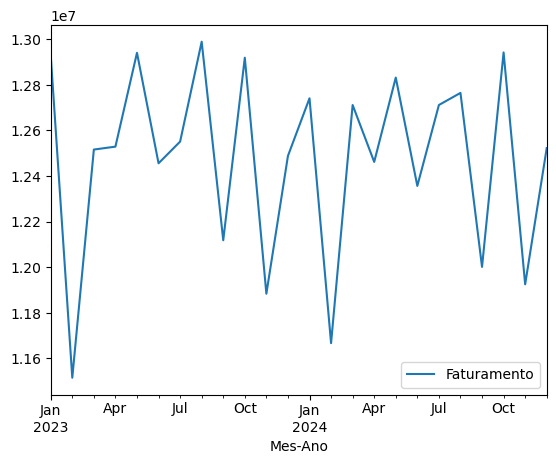

In [22]:
df_analise["Mes-Ano"] = df_analise["Data"].dt.to_period("M")
df_vendas_mes = df_analise[["Mes-Ano", "Faturamento"]].groupby("Mes-Ano").sum()
df_vendas_mes.plot()
display(df_vendas_mes)